In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [34]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [35]:

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_", regex=False)
      .str.replace("-", "_", regex=False)
)

def pick(df_cols, *candidates):
    for c in candidates:
        if c in df_cols:
            return c
    raise KeyError(f"None of {candidates} found in columns: {list(df_cols)}")

math_col    = pick(df.columns, "math_score", "maths_score", "maths", "math")
reading_col = pick(df.columns, "reading_score", "reading")
writing_col = pick(df.columns, "writing_score", "writing")
gender_col  = pick(df.columns, "gender", "sex")
lunch_col   = pick(df.columns, "lunch", "lunch_type")
test_col    = pick(df.columns, "test_preparation_course", "test_prep", "test_prep_course")


In [36]:
scores = [math_col, reading_col, writing_col]
for c in scores:
    df[c] = pd.to_numeric(df[c], errors="coerce")

grp = df.groupby([gender_col, lunch_col, test_col])
for c in scores:
    df[c] = df[c].fillna(grp[c].transform("median"))
    df[c] = df[c].fillna(df[c].median())


In [37]:
cleaned_path = os.path.join('/content', "StudentsPerformance_cleaned.csv")
df.to_csv(cleaned_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_path}")


Cleaned dataset saved to: /content/StudentsPerformance_cleaned.csv


In [38]:

FIG_W, FIG_H = 800/100, 600/100  # inches
DPI_SAVE = 300

result_dir = '/content/question_2/Result'
os.makedirs(result_dir, exist_ok=True)


/tmp/ipython-input-3771837512.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_v1, labels=labels_v1, showmeans=True, patch_artist=True)


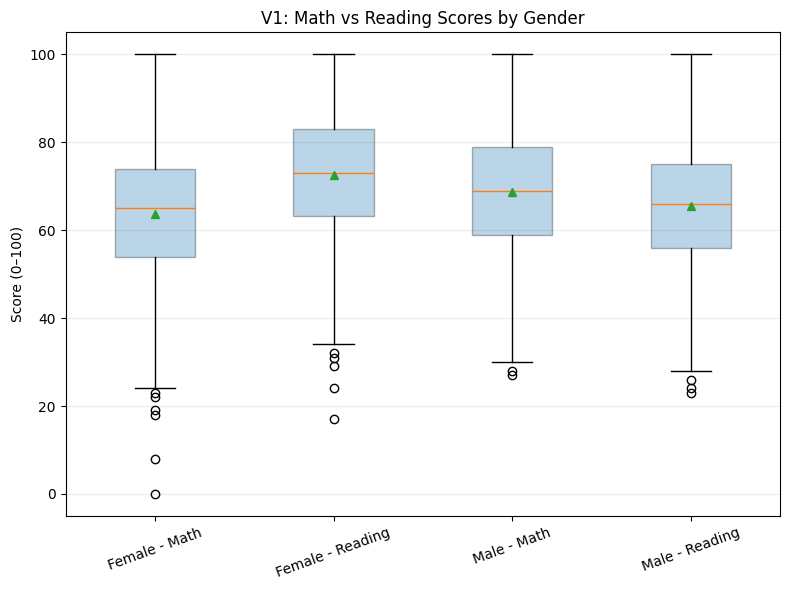

In [40]:
plt.figure(figsize=(FIG_W, FIG_H))
genders = df[gender_col].dropna().unique().tolist()
data_v1 = []
labels_v1 = []

for g in genders:
    sub = df[df[gender_col] == g]
    data_v1.append(sub[math_col].values)
    data_v1.append(sub[reading_col].values)
    labels_v1.append(f"{g.title()} - Math")
    labels_v1.append(f"{g.title()} - Reading")

bp = plt.boxplot(data_v1, labels=labels_v1, showmeans=True, patch_artist=True)
for b in bp["boxes"]:
    b.set_alpha(0.3)

plt.ylabel("Score (0–100)")
plt.title("V1: Math vs Reading Scores by Gender")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.savefig(os.path.join('/content/Results', "V1_gender_boxplots.png"), dpi=DPI_SAVE)
plt.show()



/tmp/ipython-input-3101405361.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=test_col, y=math_col, data=df, palette="Set2", showmeans=True)


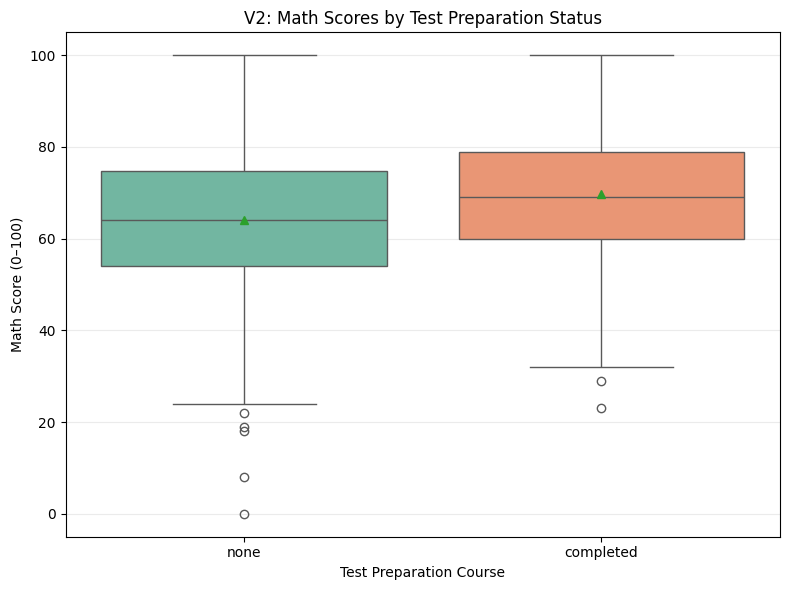

In [43]:
import seaborn as sns

plt.figure(figsize=(FIG_W, FIG_H))
sns.boxplot(x=test_col, y=math_col, data=df, palette="Set2", showmeans=True)
plt.ylabel("Math Score (0–100)")
plt.xlabel("Test Preparation Course")
plt.title("V2: Math Scores by Test Preparation Status")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.savefig(os.path.join('/content/Results', "V2_test_prep_math.png"), dpi=DPI_SAVE)
plt.show()


/tmp/ipython-input-1044358737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lunch_col, y='overall_avg', data=avg_by_lunch, palette="Set3")


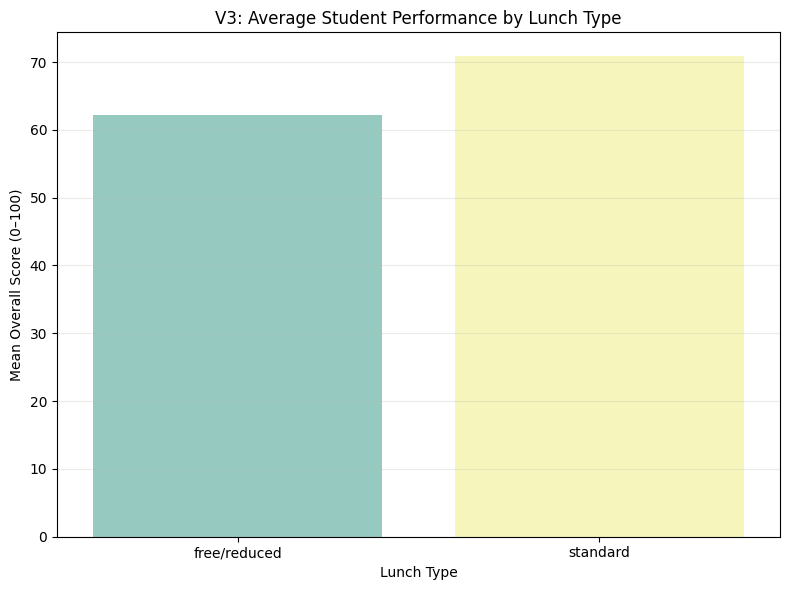

In [44]:
df['overall_avg'] = df[scores].mean(axis=1)
avg_by_lunch = df.groupby(lunch_col)['overall_avg'].mean().reset_index()

plt.figure(figsize=(FIG_W, FIG_H))
sns.barplot(x=lunch_col, y='overall_avg', data=avg_by_lunch, palette="Set3")
plt.ylabel("Mean Overall Score (0–100)")
plt.xlabel("Lunch Type")
plt.title("V3: Average Student Performance by Lunch Type")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.savefig(os.path.join('/content/Results', "V3_lunch_avg.png"), dpi=DPI_SAVE)
plt.show()


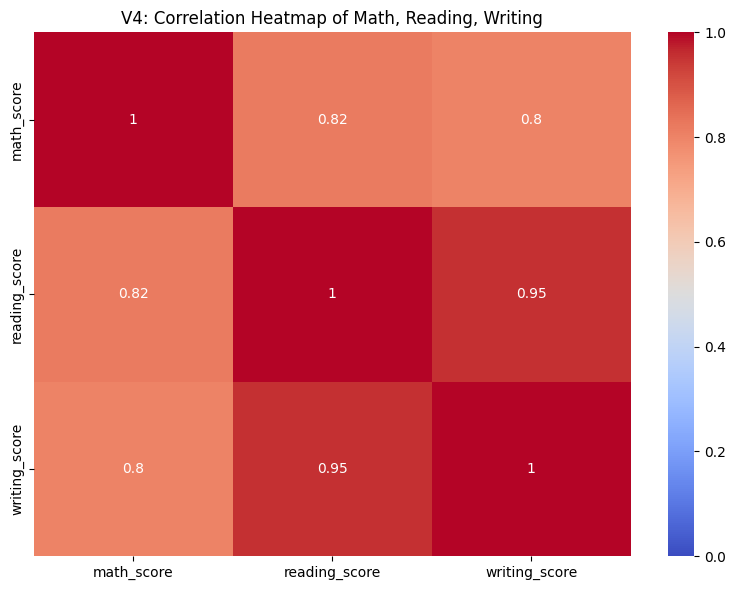

In [45]:
plt.figure(figsize=(FIG_W, FIG_H))
corr = df[scores].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("V4: Correlation Heatmap of Math, Reading, Writing")
plt.tight_layout()
plt.savefig(os.path.join('/content/Results', "V4_subject_correlation.png"), dpi=DPI_SAVE)
plt.show()


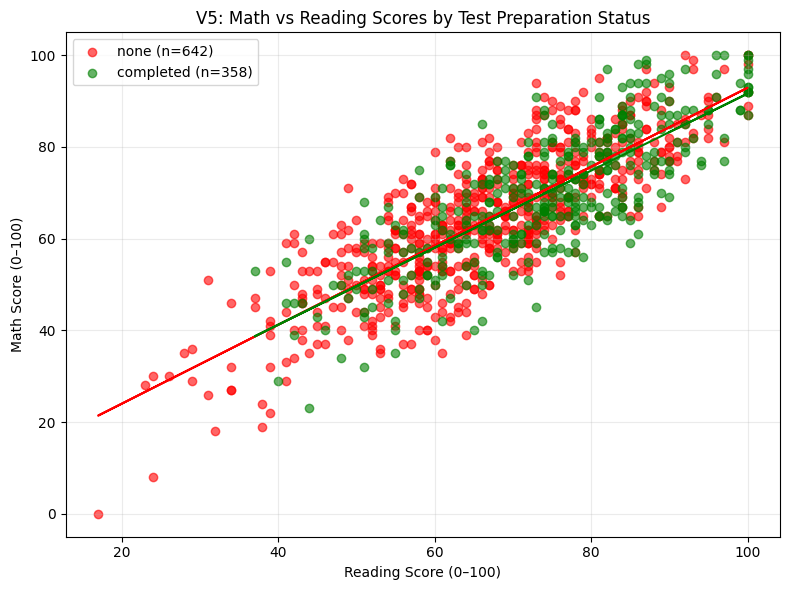

In [46]:
plt.figure(figsize=(FIG_W, FIG_H))
colors = {'completed': 'green', 'none': 'red'}

for status in df[test_col].unique():
    sub = df[df[test_col] == status]
    plt.scatter(sub[reading_col], sub[math_col], label=f"{status} (n={len(sub)})", color=colors[status], alpha=0.6)
    m, b = np.polyfit(sub[reading_col], sub[math_col], 1)
    plt.plot(sub[reading_col], m*sub[reading_col]+b, color=colors[status])

plt.xlabel("Reading Score (0–100)")
plt.ylabel("Math Score (0–100)")
plt.title("V5: Math vs Reading Scores by Test Preparation Status")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.savefig(os.path.join('/content/Results', "V5_math_reading_trend.png"), dpi=DPI_SAVE)
plt.show()
